<a href="https://colab.research.google.com/github/mauludsy/FP_BDDM/blob/master/BigDataPredictive_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Mengimport Library yang dibutuhkan**

In [ ]:
# Tools for analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#**Mengimport Datasheet**

In [ ]:
stunting_data = pd.read_csv('/content/drive/MyDrive/content/stunting_wasting_dataset.csv')

In [ ]:
print(stunting_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None


**Menampilkan summary dari datasheet**

In [ ]:
stunting_data.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


**Perintah untuk menampilkan datasheet dari yang paling atas**

In [ ]:
print(stunting_data.head())

  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0     Laki-laki            19               91.6              13.3   
1     Laki-laki            20               77.7               8.5   
2     Laki-laki            10               79.0              10.3   
3     Perempuan             2               50.3               8.3   
4     Perempuan             5               56.4              10.9   

           Stunting             Wasting  
0              Tall  Risk of Overweight  
1           Stunted         Underweight  
2            Normal  Risk of Overweight  
3  Severely Stunted  Risk of Overweight  
4  Severely Stunted  Risk of Overweight  


**Mengganti nama kolom fitur "Jenis Kelamin", menjadi "Gender"**

In [ ]:
stunting_data.rename(columns={'Jenis Kelamin': 'Gender'}, inplace=True)

**Mengecek nilai null pada kolom fitur maupun target**

In [ ]:
print(stunting_data.isnull().sum())

Gender               0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


**Mengecek Missing value pada datasheet**

In [ ]:
# Mengecek jumlah missing values per kolom
missing_values = stunting_data.isnull().sum()
print(missing_values)

Gender               0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


**Menhapus kolom target "Gender" dan "Wasting"**

In [ ]:
# Menghapus kolom 'Wasting' dan 'Gender' dari dataset
stunting_data_cleaned = stunting_data.drop(columns=['Gender','Wasting'])

# Menampilkan dataset setelah kolom dihapus
print(stunting_data_cleaned.head())

   Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)          Stunting
0            19               91.6              13.3              Tall
1            20               77.7               8.5           Stunted
2            10               79.0              10.3            Normal
3             2               50.3               8.3  Severely Stunted
4             5               56.4              10.9  Severely Stunted


In [ ]:
# Menampilkan value unik dari kolom tertentu dengan filter untuk 'Stunting'
columns_to_check = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)', 'Stunting']

for column in columns_to_check:
    print(f"Kolom: {column}")

    if column == 'Stunting':
        # Menampilkan hanya nilai 'Normal' dan 'Stunted'
        filtered_values = stunting_data[column].loc[stunting_data[column].isin(['Normal', 'Stunted'])].unique()
        print(filtered_values)
    else:
        # Menampilkan nilai unik untuk kolom selain 'Stunting'
        print(stunting_data[column].unique())

    print("-" * 30)


Kolom: Umur (bulan)
[19 20 10  2  5 11 16 15 18  6 17  7 21  3 13 23 12 24  9  8 22  4  0  1
 14]
------------------------------
Kolom: Tinggi Badan (cm)
[91.6 77.7 79.  50.3 56.4 76.3 80.7 72.6 78.4 63.4 60.4 77.5 76.6 59.8
 82.8 84.7 86.2 61.2 69.8 80.5 84.1 67.8 97.4 59.4 72.5 76.7 53.1 64.7
 73.8 68.8 84.4 88.1 92.5 77.6 71.3 92.8 46.3 80.3 68.5 68.4 89.8 78.6
 74.1 88.6 61.6 54.1 88.2 84.2 55.5 83.7 69.1 54.5 85.9 67.5 70.8 68.2
 78.5 43.8 82.9 84.8 51.  65.6 72.3 75.2 59.3 57.7 50.5 79.4 52.7 45.8
 54.6 81.6 64.  79.6 43.6 79.8 83.8 62.8 82.4 51.2 76.5 66.7 68.7 69.2
 49.2 80.  86.9 75.5 62.4 74.9 74.4 86.4 83.1 49.1 71.7 89.6 71.2 70.1
 60.6 54.9 80.8 70.3 48.3 84.6 48.6 72.7 66.4 68.9 62.3 61.9 79.2 88.5
 64.1 58.2 82.2 89.3 83.2 60.9 88.9 61.5 77.2 64.5 88.3 60.  55.  89.4
 86.1 78.2 74.2 83.4 45.5 62.2 78.7 51.6 75.1 64.9 74.5 73.4 85.8 48.9
 43.4 68.1 72.8 51.4 59.7 90.5 94.2 65.7 89.7 52.9 80.9 52.4 64.4 73.2
 55.2 58.6 73.9 64.8 63.3 87.1 64.3 77.9 77.3 57.  72.  83.6 94.4

In [ ]:
# Mengambil data yang hanya memiliki nilai 'Normal' dan 'Stunted' pada kolom 'Stunting'
stunting_data_cleaned = stunting_data_cleaned[stunting_data_cleaned['Stunting'].isin(['Normal', 'Stunted'])]

# Menggunakan fitur yang tersisa
X = stunting_data_cleaned[['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']]

# Target adalah kolom 'Stunting'
y = stunting_data_cleaned['Stunting']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Hapus kolom 'Jenis Kelamin' dan 'Wasting' sebelum memproses
stunting_data_cleaned = stunting_data.drop(columns=['Gender', 'Wasting'])

# Filter data untuk hanya menyertakan 'Normal' dan 'Stunting' di kolom 'Stunting'
stunting_data_filtered = stunting_data_cleaned[stunting_data_cleaned['Stunting'].isin(['Normal', 'Stunted'])]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi kolom 'Stunting' menjadi numerik
stunting_data_filtered['Stunting'] = label_encoder.fit_transform(stunting_data_filtered['Stunting'])

# Menampilkan mapping kategori ke angka
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping kategori ke angka:", label_mapping)

# Menampilkan hasil dataset setelah konversi
print(stunting_data_filtered.head())


Mapping kategori ke angka: {'Normal': 0, 'Stunted': 1}
   Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  Stunting
1            20               77.7               8.5         1
2            10               79.0              10.3         0
5            11               76.3               5.9         0
6            16               80.7               9.9         0
7            15               72.6               6.5         0


**Matriks Koorelasinya**

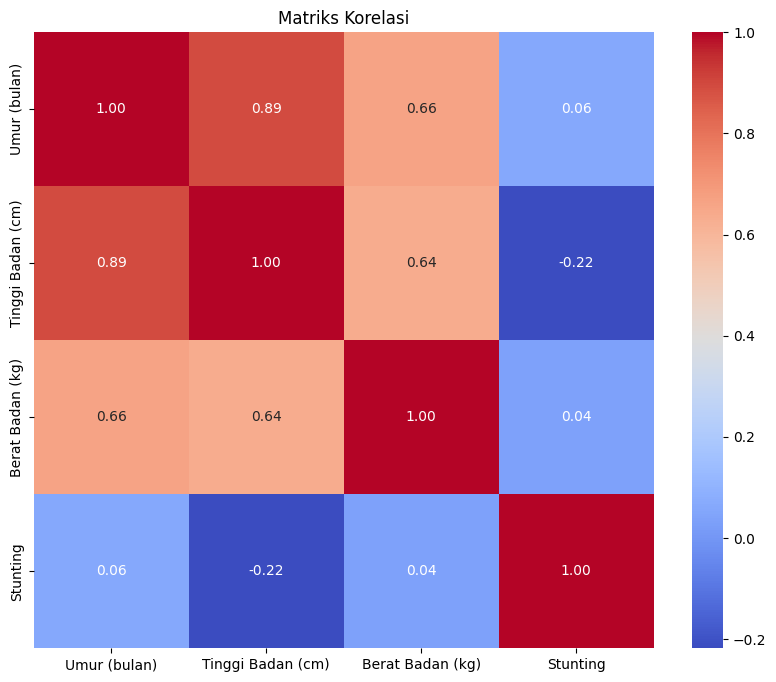

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = stunting_data_filtered.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))  # Atur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **EDA**

**a. PIE CHART**

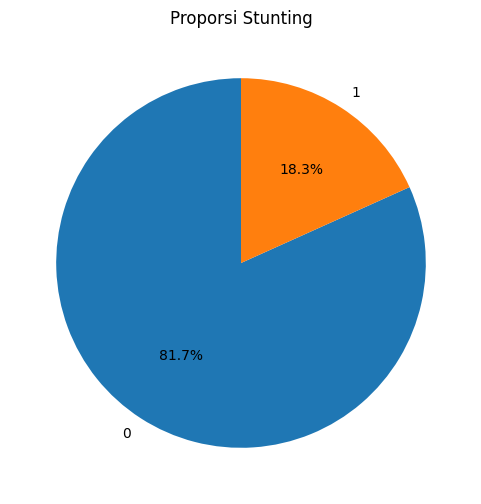

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data untuk setiap kategori
stunting_counts = stunting_data_filtered['Stunting'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))  # Atur ukuran figure
plt.pie(stunting_counts, labels=stunting_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Stunting')
plt.show()

**b. BAR CHART**

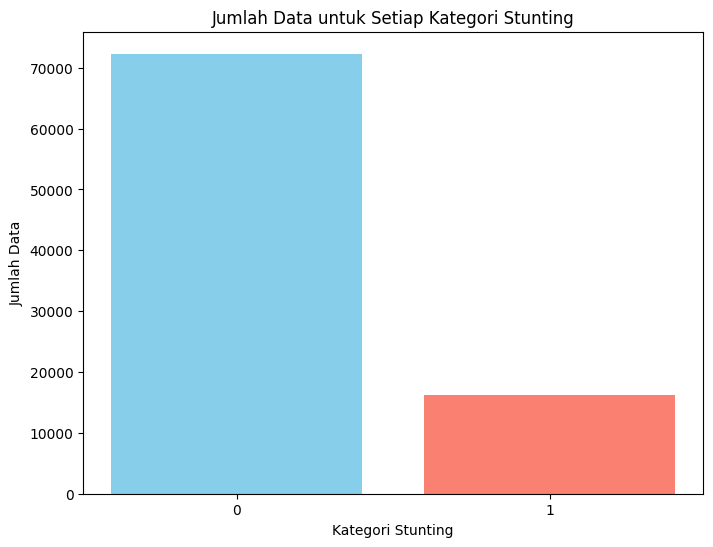

In [ ]:
categories = stunting_counts.index
counts = stunting_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'salmon'])
plt.title('Jumlah Data untuk Setiap Kategori Stunting')
plt.xlabel('Kategori Stunting')
plt.ylabel('Jumlah Data')
# Menggunakan label asli dengan label_mapping
plt.xticks(categories, [label_mapping[cat] if cat in label_mapping else cat for cat in categories])
plt.show()

**c. HISTOGRAM**

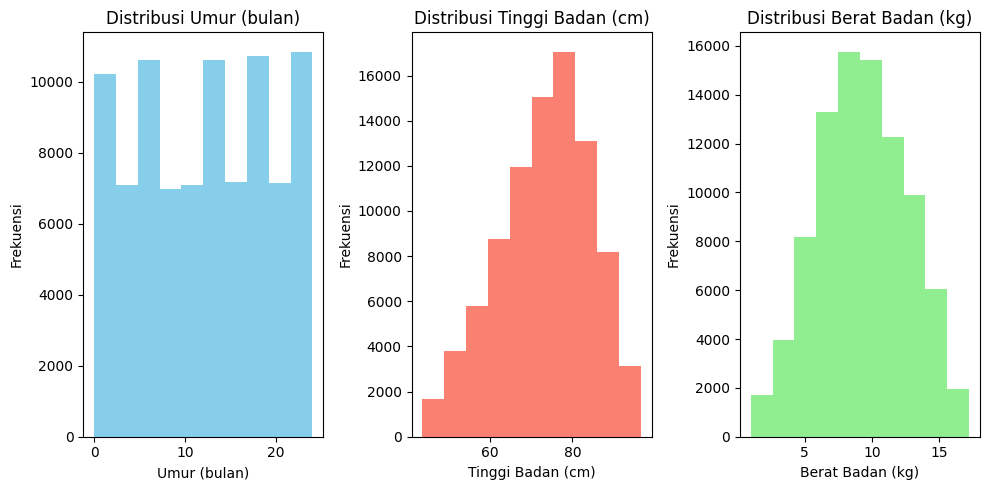

In [ ]:
plt.figure(figsize=(10, 5))

# Histogram untuk 'Umur (bulan)'
plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
plt.hist(stunting_data_filtered['Umur (bulan)'], bins=10, color='skyblue')
plt.title('Distribusi Umur (bulan)')
plt.xlabel('Umur (bulan)')
plt.ylabel('Frekuensi')

# Histogram untuk 'Tinggi Badan (cm)'
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
plt.hist(stunting_data_filtered['Tinggi Badan (cm)'], bins=10, color='salmon')
plt.title('Distribusi Tinggi Badan (cm)')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Frekuensi')

# Histogram untuk 'Berat Badan (kg)'
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
plt.hist(stunting_data_filtered['Berat Badan (kg)'], bins=10, color='lightgreen')
plt.title('Distribusi Berat Badan (kg)')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**d. BOX PLOT**

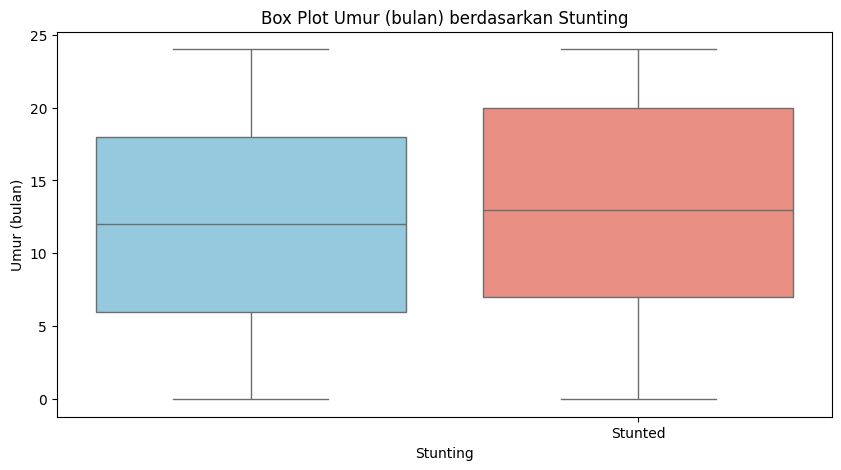

In [ ]:
plt.figure(figsize=(10, 5))

# Box plot untuk 'Umur (bulan)'
sns.boxplot(x='Stunting', y='Umur (bulan)', data=stunting_data_filtered, palette=['skyblue', 'salmon'])
plt.title('Box Plot Umur (bulan) berdasarkan Stunting')

# Menggunakan label asli dengan label_mapping dan nilai numerik
for i, label in enumerate(label_encoder.classes_):
    plt.xticks([i], [label])  # Menggunakan nilai numerik (i) untuk mengakses label_mapping
plt.show()

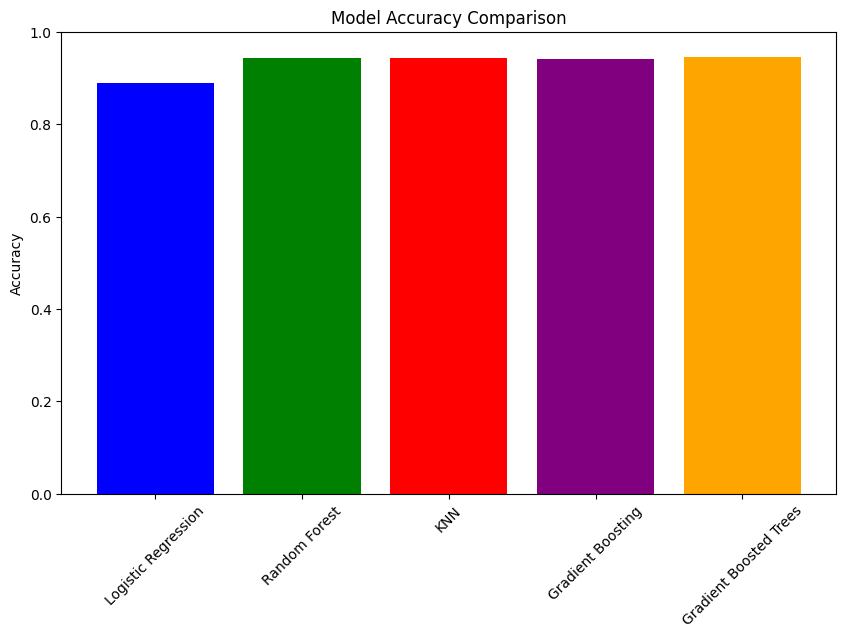

Logistic Regression:
  Accuracy: 0.89
  Precision: 0.82
  Recall: 0.78
  F1-Score: 0.80
--------------------------------------------------
Random Forest:
  Accuracy: 0.94
  Precision: 0.90
  Recall: 0.90
  F1-Score: 0.90
--------------------------------------------------
KNN:
  Accuracy: 0.94
  Precision: 0.90
  Recall: 0.91
  F1-Score: 0.91
--------------------------------------------------
Gradient Boosting:
  Accuracy: 0.94
  Precision: 0.92
  Recall: 0.88
  F1-Score: 0.90
--------------------------------------------------
Gradient Boosted Trees:
  Accuracy: 0.94
  Precision: 0.90
  Recall: 0.92
  F1-Score: 0.91
--------------------------------------------------


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gradient Boosted Trees": HistGradientBoostingClassifier()
}

# Dictionary untuk menyimpan hasil
accuracies = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Melatih dan menguji model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracies[name] = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Simpan nilai precision, recall, f1-score untuk masing-masing model
    precision_scores[name] = report['macro avg']['precision']
    recall_scores[name] = report['macro avg']['recall']
    f1_scores[name] = report['macro avg']['f1-score']

# 4. Visualisasi Akurasi
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Print akurasi, precision, recall, f1-score untuk setiap model
for name in models.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracies[name]:.2f}")
    print(f"  Precision: {precision_scores[name]:.2f}")
    print(f"  Recall: {recall_scores[name]:.2f}")
    print(f"  F1-Score: {f1_scores[name]:.2f}")
    print("-" * 50)


**Hypertunning pada Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Tentukan *hyperparameter* dan rentang nilainya
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek Random Forest
rf = RandomForestClassifier()

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan kombinasi *hyperparameter* terbaik
print("Kombinasi hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model dengan kombinasi *hyperparameter* terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Kombinasi hyperparameter terbaik: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97     14470
     Stunted       0.83      0.86      0.85      3225

    accuracy                           0.94     17695
   macro avg       0.90      0.91      0.91     17695
weighted avg       0.94      0.94      0.94     17695



**GradientBoostingClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Tentukan hyperparameter dan rentang nilainya
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0, 0.1, 0.5],
}

# Buat objek HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan kombinasi hyperparameter terbaik
print("Kombinasi hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model dengan kombinasi hyperparameter terbaik
best_hgb = grid_search.best_estimator_
y_pred = best_hgb.predict(X_test)
print(classification_report(y_test, y_pred))

Kombinasi hyperparameter terbaik: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 100}
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97     14470
     Stunted       0.82      0.88      0.85      3225

    accuracy                           0.94     17695
   macro avg       0.90      0.92      0.91     17695
weighted avg       0.95      0.94      0.94     17695



#**Menyimpan Model yang sudah ditentukan**

In [ ]:
import joblib

# Simpan model Gradient Boosting ke file bernama "GradientBoosting.pkl"
joblib.dump(models['Gradient Boosting'], "GradientBoosting.pkl")
print("Model Gradient Boosting berhasil disimpan!")

Model Gradient Boosting berhasil disimpan!


#**Lalu melakukan Split dan Scaling data dan meyimpannya**

In [ ]:
# 1. Load Dataset
stunting_data = pd.read_csv('/content/drive/MyDrive/content/stunting_wasting_dataset.csv')

# 2. Hapus kolom 'Jenis Kelamin' dan 'Wasting'
stunting_data = stunting_data.drop(columns=['Jenis Kelamin', 'Wasting'])

# 3. Pisahkan fitur (X) dan label (y)
X = stunting_data.drop(columns=['Stunting'])  # Menghapus kolom target
y = stunting_data['Stunting']  # Kolom target (label)

# 4. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Preprocessing (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform pada data training
X_test_scaled = scaler.transform(X_test)       # Hanya transform pada data testing

# 6. Simpan Scaler
scaler_filename = "Scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler telah disimpan ke file: {scaler_filename}")

# 7. Load Scaler (untuk digunakan kembali di tahap inferensi)
loaded_scaler = joblib.load(scaler_filename)

Scaler telah disimpan ke file: Scaler.pkl


#**Melakukan prediksi dengan model yang sudah ditentukan diatas**

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Data baru
new_data = np.array([[10,79.0,10.3]])

# Ubah data baru ke DataFrame
new_data_df = pd.DataFrame(new_data, columns=['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)'])

# Scale data baru
new_data_scaled = scaler.transform(new_data_df)

# Memuat model RandomForest dari file
loaded_model = joblib.load("GradientBoosting.pkl")

# Prediksi menggunakan model RandomForest
hasil = loaded_model.predict(new_data_scaled)

# Tampilkan hasil prediksi
print(f"Prediksi: {hasil[0]}")


Prediksi: Stunted
